In [1]:
import numpy as np

In [10]:
N = 20
x, h = np.linspace(0,1,N+1, retstep=True)
u = np.zeros((N+1,N+1))

In [11]:
def mu_x1_0(x2):
    return x2 ** 2

def mu_x2_0(x1):
    return x1 ** 2

def mu_x1_1(x2):
    return 1+ x2 ** 2

def mu_x2_1(x1):
    return 1+ x1 ** 2

In [12]:
for i in range(N+1):
    for j in range(N+1):
        if i == 0:
            u[i][j] = mu_x1_0(j * h)
        if j == 0:
            u[i][j] = mu_x2_0(i * h)
        if i == N:
            u[i][j] = mu_x1_1(j * h)
        if j == N:
            u[i][j] = mu_x1_1(i * h)

In [14]:
u

array([[0.    , 0.0025, 0.01  , 0.0225, 0.04  , 0.0625, 0.09  , 0.1225,
        0.16  , 0.2025, 0.25  , 0.3025, 0.36  , 0.4225, 0.49  , 0.5625,
        0.64  , 0.7225, 0.81  , 0.9025, 1.    ],
       [0.0025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 1.0025],
       [0.01  , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 1.01  ],
       [0.0225, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 1.0225],
       [0.04  , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 1.04  ],
       [0.0625, 0.    , 0.    , 0. 

In [29]:
def f(x,y):
    return 4

error = 1
while error > 10**-6:
    u_0 = u.copy()
    for i in range(1, N):
        for j in range(1, N):
            u[i][j] = 0.25 * (u[i - 1][j] + u_0[i + 1][j] + u[i][j - 1] + u_0[i][j + 1] - h ** 2 * f(h*i, h*j))
    error = np.linalg.norm(u - u_0) * h

In [30]:
X1, X2 = np.meshgrid(x, x)

In [31]:
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\2363800874.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


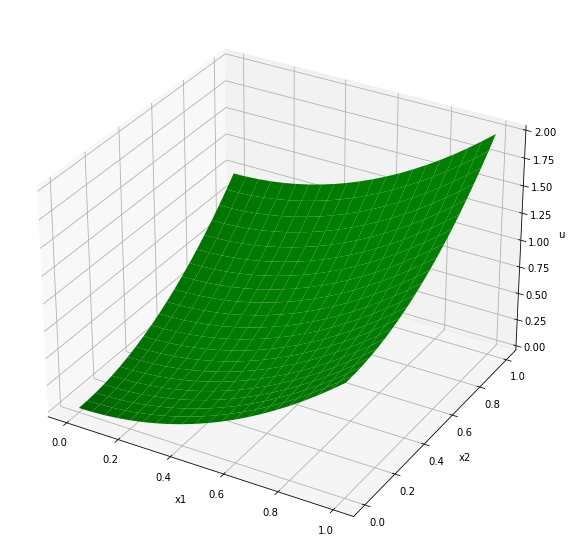

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, u, color='g')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('u')
plt.savefig('Seidel.png')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\2494759395.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


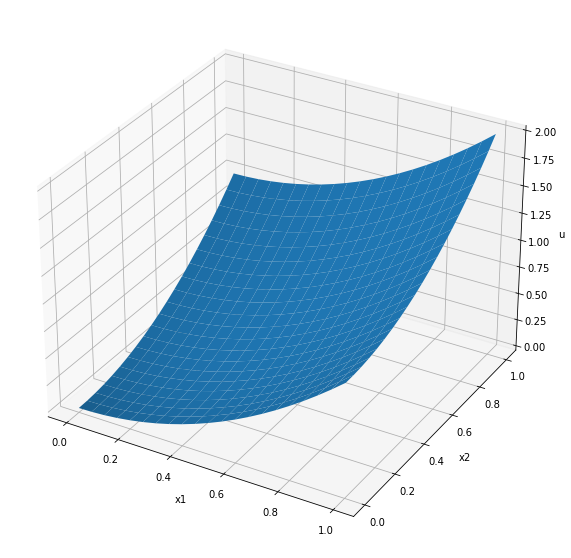

In [45]:
def u_anal(x, y):
    return x ** 2 + y ** 2


h = 0.05
x_max = 1.

# генерируем сетку
x1 = np.arange(0, x_max + h, h) 
x2 = np.arange(0, x_max + h, h)
X1, X2 = np.meshgrid(x1, x2)
U1 = u_anal(X1, X2)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, U1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('u')
plt.savefig('True.png')

In [37]:
np.linalg.norm(U1 - u) * h

3.917327342074033e-05